In [2]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from scipy import signal

sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd
import proper_elements
import tools

In [3]:
flag, epoch, sim = sbd.initialize_simulation(des='28', clones=0)

In [4]:
#max time in the integration (years)
tmax = 10e6

#how often you want to save the simulation archive file
tout = 1e3
savefile = "28-archive.bin"
datadir='/Users/kvolk/Dropbox/Active-Projects/sbdynt-software-development/proper-elements-testing/'
#run the simulation, deleting any existing simulation archive
flag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,archivefile=savefile,deletefile=True,datadir=datadir)

In [20]:
datadir='/Users/kvolk/Dropbox/Active-Projects/sbdynt-software-development/proper-elements-testing/'

flag, a, e, inc, node, aperi, ma, t = tools.read_sa_for_sbody(sbody='28', 
                        nclones=0,archivefile="28-archive.bin",center='helio',datadir=datadir)

lperi = node+aperi
lperi = tools.arraymod2pi(lperi)

#lperi_f = tools.arraymod2pi(lperi_f)

p = np.sin(inc)*np.sin(node)
q = np.sin(inc)*np.cos(node)

h = e*np.sin(lperi)
k = e*np.cos(lperi)

In [21]:
#set up the FFT frequency array
dt = t[1]-t[0]
n = len(t)
freq = np.fft.rfftfreq(n,d=dt)
print(1/freq)

Yp = np.fft.rfft(p)
Yq = np.fft.rfft(q)
Yh = np.fft.rfft(h)
Yk = np.fft.rfft(k)
print(Yp)

sind = np.argmax(np.abs(Yp[1:]))+1
s = freq[sind]
print(1./s)

gind = np.argmax(np.abs(Yh[1:]))+1
g = freq[gind]
print(1./g)

[           inf 1.00010800e+07 5.00054000e+06 ... 2.00101641e+03
 2.00061612e+03 2.00021600e+03]
[2.59914844e+02+0.j         1.63493498e-01+0.09398748j
 1.17019706e-01+0.21057574j ... 9.32469319e-02+0.00037424j
 9.41329297e-02+0.00520982j 9.29061705e-02-0.00086673j]
19381.93799995592
22524.954972921743


/var/folders/2k/69sqc36543z4n638t2rbf6tw0000gn/T/ipykernel_40407/2484980563.py:5: RuntimeWarning: divide by zero encountered in divide
  print(1/freq)


In [86]:
import hard_coded_constants as const

z1 = abs(g+s-const.g6-const.s6)
z2 = abs(g+s-const.g5-const.s7)
z3 = abs(g+s-const.g5-const.s6)
z4 = abs(g-2.*const.g6+const.g5)
z5 = abs(g-2.*const.g6+const.g7)
z6 = abs(s-const.s6-const.g5+const.g6)
z7 = abs(g-3.*const.g6+2.*const.g5)
z8 = abs(2.*(g-const.g6)+s-const.s6)
z9 = abs(3.*(g-const.g6)+s-const.s6)
z10 = 2.*abs(const.s3)
z11 = 2.*abs(const.s2)

filt_freq = [np.abs(const.s1),np.abs(const.s2),np.abs(const.s3),np.abs(const.s4),np.abs(const.s6),np.abs(const.s7),np.abs(const.s8),z1,z2,z3,z6,z8,z9,z10,z11]
filt_freq = np.array(filt_freq)
#print(filt_freq)
print(filt_freq)

#print(1./s)



secresind1 = []

for f in filt_freq:
    try:
        secresind1.append(np.where(freq>=f)[0][0])
    except:
        continue
print(secresind1)



[4.01353395e-06 5.07006173e-06 1.44626466e-05 1.36059491e-05
 2.03279040e-05 2.30915195e-06 5.34347114e-07 9.45231467e-05
 9.50136822e-05 1.13032434e-04 9.04316193e-05 1.17123962e-04
 1.39724777e-04 2.89252932e-05 1.01401235e-05]
[41, 51, 145, 137, 204, 24, 6, 946, 951, 1131, 905, 1172, 1398, 290, 102]


/var/folders/2k/69sqc36543z4n638t2rbf6tw0000gn/T/ipykernel_40407/3831789871.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(1/freq,Yp,s=3.5)


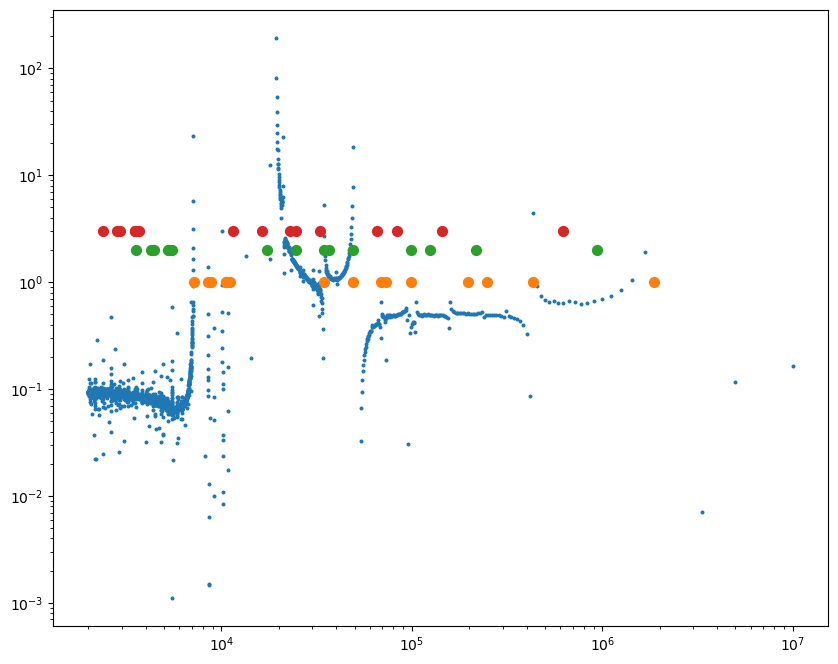

In [43]:
f = plt.figure(figsize=(10,8))
plt.scatter(1/freq,Yp,s=3.5)
#plt.scatter(1/freq,Yp**2.,s=3.5)

#plt.scatter(1/freq,Yp_f**2.,s=2.5)
plt.yscale('log')
plt.xscale('log')
plt.scatter(1/filt_freq,(np.ones(len(filt_freq))),s=50)
plt.scatter(1/(2*filt_freq),(2.*np.ones(len(filt_freq))),s=50)
plt.scatter(1/(3*filt_freq),(3.*np.ones(len(filt_freq))),s=50)

In [87]:
#Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]
#want to stop frequencies in this range:
#[freq[i-5],freq[i+5]]
i=41
N, Wn = signal.buttord(wp=[freq[i-5],freq[i+5]], ws=[freq[i-3],freq[i+3]], gpass=3, gstop=40, analog=False,fs=(1./dt))
print(N,1./Wn)
print(freq[i-5],freq[i+5]) 
print(freq[i-3],freq[i+3])

print(1./dt)

10 [275201.94189804 217520.03793303]
3.599611239114674e-06 4.599503249979861e-06
3.7995896412877113e-06 4.3995248478068235e-06
0.0009999920000662737


In [72]:
Yp[0] = 0.
Yq[0] = 0.
pt = np.fft.irfft(Yp)
qt = np.fft.irfft(Yq)

In [96]:
5.34347114e-07
print(freq[3]-freq[2])
print(freq[1000]-freq[999])
df = (freq[1000]-freq[999])
print(df)

9.998920108651875e-08
9.998920108652187e-08
9.998920108652187e-08


[263186.3159994  256437.94892249 250027.00019943 243928.78068237
 238120.95257089 232583.25599947]


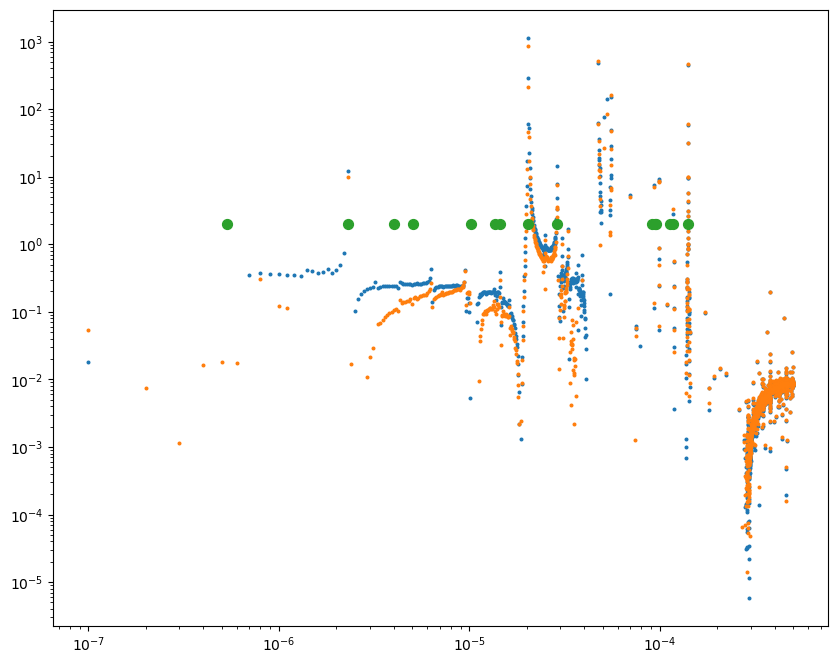

In [102]:
ff = 5.34347114e-07
print(1/freq[i-3:i+3])
sos = signal.butter(10, [(ff-2.*df),(ff+2.*df)], 'bandstop', fs=1./dt,output='sos')
bs_filt_p = signal.sosfilt(sos, pt)
Ybs_f_p = np.fft.rfft(bs_filt_p)
f = plt.figure(figsize=(10,8))
plt.scatter(freq,Yp**2,s=3.5)
plt.scatter(freq,Ybs_f_p**2,s=3.5)
#plt.scatter(freq,Yp,s=3.5)
#plt.scatter(freq,Ybs_f_p,s=3.5)
#plt.scatter(1/freq,Yp_f**2.,s=2.5)
plt.yscale('log')
plt.xscale('log')
plt.scatter(filt_freq,(2.*np.ones(len(filt_freq))),s=50)

In [ ]:
sos = signal.butter(N, Wn, 'bandstop', fs=1./dt,output='sos')
#filtered = signal.sosfilt(sos, p)
Yp = np.fft.rfft(p)
Yq = np.fft.rfft(q)
Yp[0] = 0.
Yq[0] = 0.
pt = np.fft.irfft(Yp)
qt = np.fft.irfft(Yq)
tt = t[1::]

print(len(tt))
print(len(p))
print(len(pt))
print(p)
print(pt)

sos = signal.butter(4, 1/5000., 'lowpass', fs=1./dt,output='sos')
filtered_p = signal.sosfilt(sos, pt)
filtered_q = signal.sosfilt(sos, qt)


Yp = np.fft.rfft(filtered_p)





for i in secresind1:
    sos = signal.butter(1, [freq[i-5],freq[i+5]], 'bandstop', fs=1./dt,output='sos')
    filtered_p = signal.sosfilt(sos, filtered_p)
    filtered_q = signal.sosfilt(sos, filtered_q)